In [1]:
import pickle
import numpy as np
from symbolic_regression.utils.visualization import plot_results
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [4]:
data = pickle.load(open("data_20251214_173242.pkl", "rb"))
results_df, features, equations = data['df'], data['features'], data['equations']

In [ ]:
results_df.head(2)  

dataset            CCUN                                                \
method          RFGPCMI                                            GP   
metric  training_losses validation_losses test_losses training_losses   
epoch                                                                   
10             0.145533          0.157245    0.155796        0.154280   
20             0.145166          0.156042    0.153209        0.149202   

dataset                                                                  \
method                                         GPSHAP                     
metric  validation_losses test_losses training_losses validation_losses   
epoch                                                                     
10                0.16735    0.168036        0.157800          0.168845   
20                0.16360    0.160687        0.150599          0.163878   

dataset                   Friedman1  ...                        CCUN  \
method                      RFGPCMI  ...   RFGPCMI_r        GPSHAP_r   
metric  test_losses training_losses  ... test_losses training_losses   
epoch                                ...                               
10         0.168423        0.161441  ...    0.234928        0.152259   
20         0.161456        0.165333  ...    0.232488        0.150269   

dataset                                                                  \
method                                           GP_r                     
metric  validation_losses test_losses training_losses validation_losses   
epoch                                                                     
10               0.160618    0.163707        0.155199          0.167147   
20               0.157371    0.162464        0.151870          0.162244   

dataset                                                            
method                    RFGPCMI_r                                
metric  test_losses training_losses validation_losses test_losses  
epoch                                                              
10         0.167152        0.146234           0.15627    0.155872  
20         0.164612        0.145648           0.15447    0.154831  

[2 rows x 54 columns]

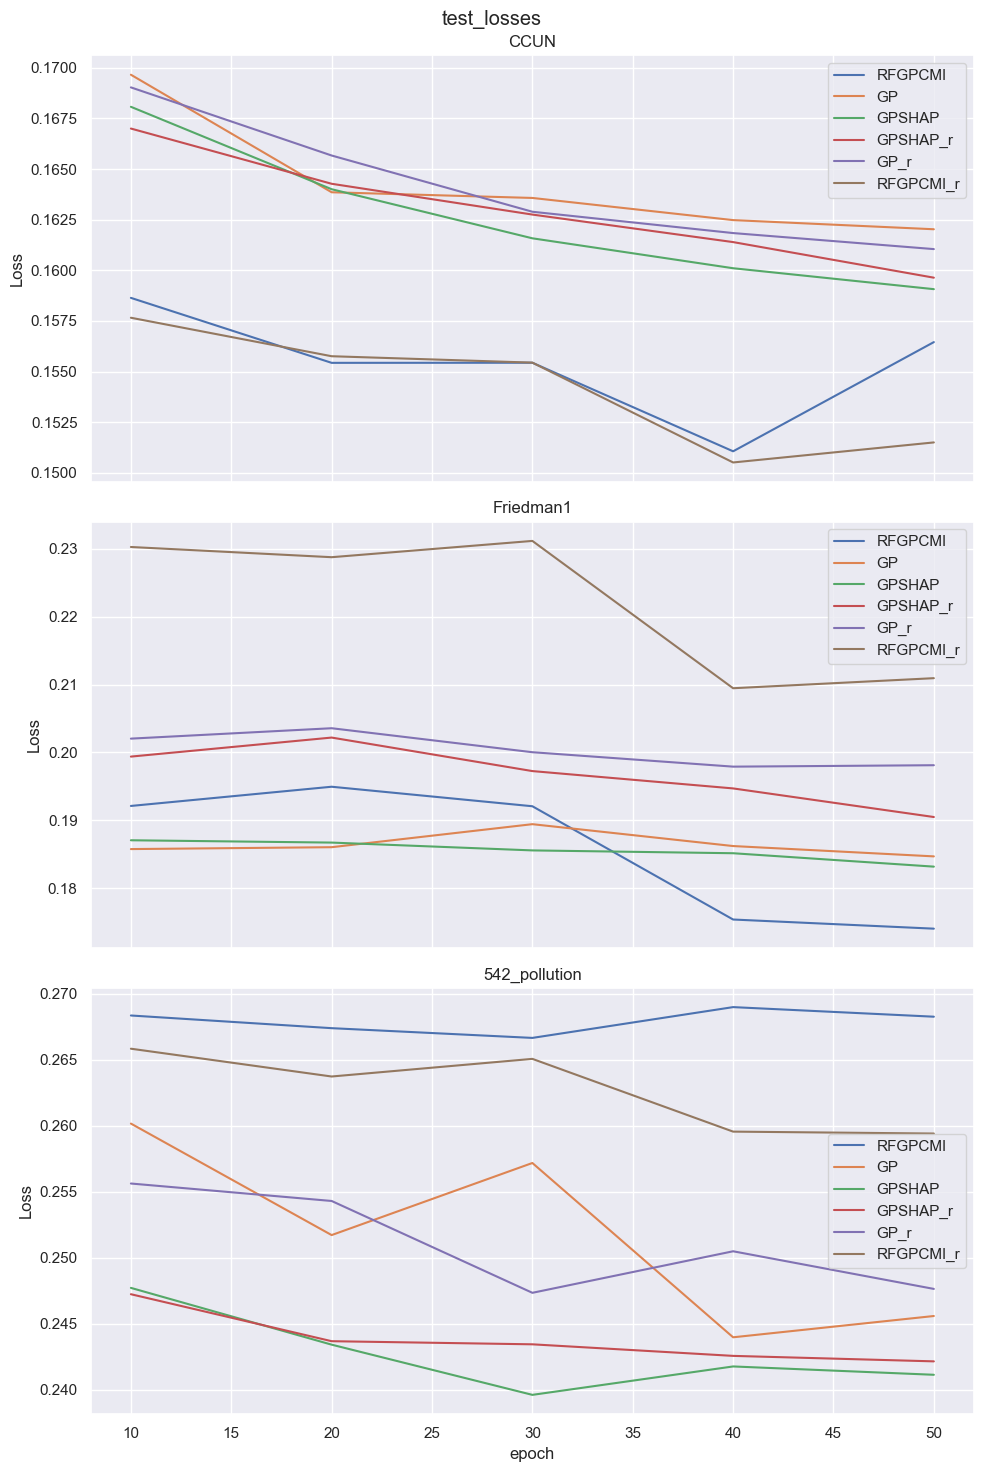

In [12]:
fig, axes = plot_results(
    results_df.groupby(level='epoch').mean(), 
    nrows=3, 
    # ncols=2, 
    group_level="dataset",
    value_level="metric",
    value_key="test_losses",
    plotting_function=lambda data, ax: sns.lineplot(data=data, ax=ax, dashes=None)
)

fig.figure.set_size_inches(10, 15)
fig.tight_layout(w_pad=0.5)

# axes[2].set_ylim(0, 0.01)
# fig.suptitle("GPSHAP", y=1.01)
plt.show()

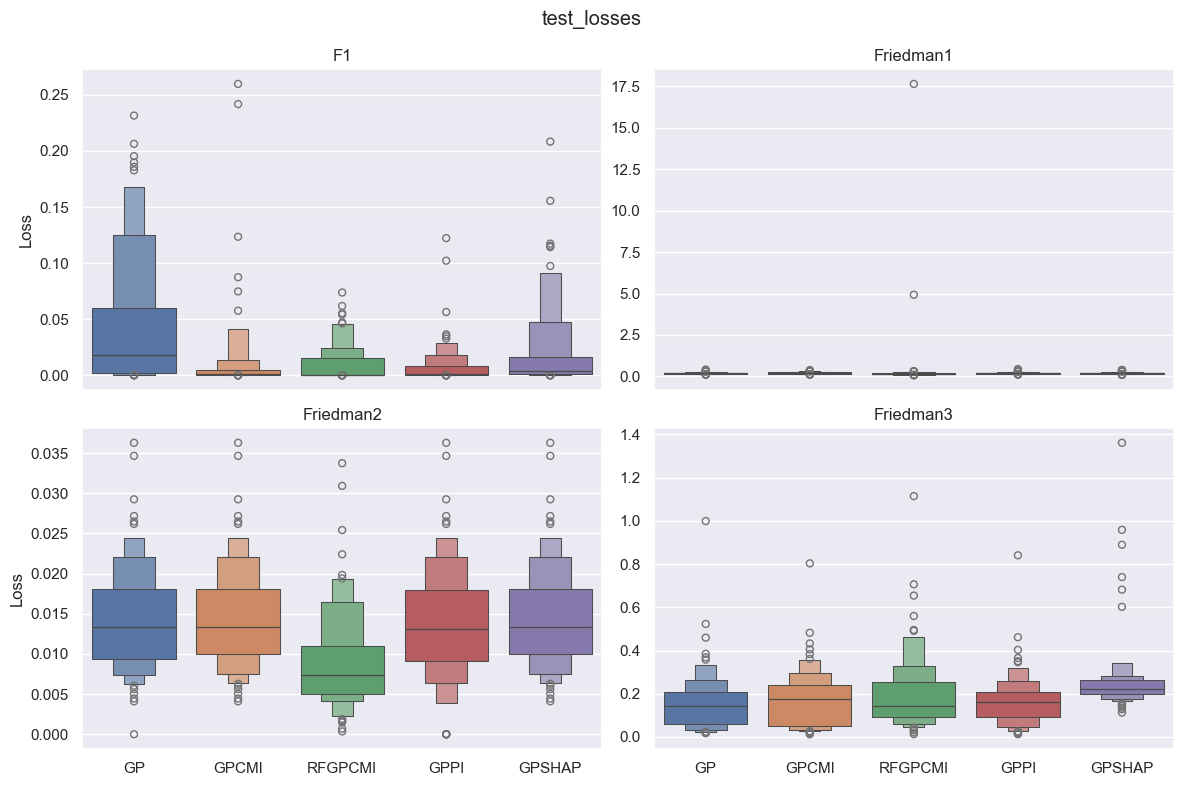

In [136]:
fig, axes = plot_results(
    results_df.groupby(level='run').last(), 
    nrows=2, 
    # ncols=3, 
    # group_level="model",
    # value_level="metric", 
    value_key="test_losses"
    # value_key="validation_losses",
    # value_key="training_losses"
)

fig.figure.set_size_inches(12, 8)
# # fig.figure.set_size_inches(4, 6)
fig.tight_layout(w_pad=0.5)
# fig.suptitle("Test Loss for Different Methods", y=1.04)
# fig.supylabel("Test Loss", x=-.02)
# fig.supxlabel("Methods", y=-.05)

# axes[0].set_ylim(0, 0.02)
# axes[1].set_ylim(.0, 0.3)
# axes[3].set_ylim(.0, 0.4)
plt.show()

In [20]:
print('Mean Unique Features per Method')
print('-------------------------------\n')

for dataset_name in features.keys():
    print(f"{dataset_name} features:")

    for method in features[dataset_name].keys():
        list_of_lists = features[dataset_name][method]

        if isinstance(list_of_lists[0][0], str):
            a = [len(alist) for alist in list_of_lists]

        else:
            a = [len(set([item for sublist in alist for item in sublist])) for alist in list_of_lists]
        
        print(f"{method}: {np.mean(a):.2f} ± {np.std(a):.2f}")
    print()
            

Mean Unique Features per Method
-------------------------------

F1 features:
GP: 53.00 ± 0.00
GPCMI: 3.33 ± 0.73
RFGPCMI: 3.74 ± 1.00
GPPI: 3.00 ± 0.00
GPSHAP: 6.00 ± 0.00

Friedman1 features:
GP: 10.00 ± 0.00
GPCMI: 3.14 ± 1.13
RFGPCMI: 4.51 ± 0.94
GPPI: 4.00 ± 0.00
GPSHAP: 3.00 ± 0.00

Friedman2 features:
GP: 4.00 ± 0.00
GPCMI: 2.01 ± 0.10
RFGPCMI: 2.95 ± 0.30
GPPI: 4.00 ± 0.00
GPSHAP: 2.00 ± 0.00

Friedman3 features:
GP: 4.00 ± 0.00
GPCMI: 2.76 ± 0.59
RFGPCMI: 3.01 ± 0.27
GPPI: 4.00 ± 0.00
GPSHAP: 2.00 ± 0.00



In [11]:
from symbolic_regression.methods.gp import GP
from symbolic_regression.methods.gpshap import GPSHAP
from symbolic_regression.utils.model_utils import process_task
from symbolic_regression.utils.data_utils import train_val_test_split
from symbolic_regression.utils.datasets import load_datasets

In [12]:
gp = GP()
gpshap = GPSHAP()

gp.pysr_params['verbosity'] = 0
gp.pysr_params['deterministic'] = True
gp.pysr_params['parallelism'] = 'serial'
gpshap.pysr_params['verbosity'] = 0
gpshap.pysr_params['deterministic'] = True
gpshap.pysr_params['parallelism'] = 'serial'


datasets = load_datasets(['F1'])
X, y = datasets['F1']['X'], datasets['F1']['y']
train_val_test_set = train_val_test_split(X=X, y=y)

In [15]:
# dataset_name: str,
# method_name: str,
# run: int,
# train_val_test_set: Tuple[Unknown, ...],
# method: BaseMethod,
# output_dir: str,
# return_results: bool = False,
# random_state: int | None = None

# gpshap.precompute_features(X, y)

# print("Phase 1: GPSHAP")

# resGPSHAP = pickle_and_execute(
#     func=process_task,
#     dataset_name='F1',
#     method_name='GPSHAP',
#     run=0,
#     train_val_test_set=train_val_test_set,
#     method=gpshap,
#     output_dir='./results',
#     return_results=True,
#     random_state=42
# )

# with open('logs/process_task_params.pkl', 'rb') as f:
#     gpshap_params = dill.load(f)

# print("Phase 2: GPSHAP Re-execution")

# resGPSHAP2 = process_task(**gpshap_params['kwargs'])

resGP = pickle_and_execute(
    func=process_task,
    filename='gp_params.pkl',
    dataset_name='F1',
    method_name='GP',
    run=0,
    train_val_test_set=train_val_test_set,
    method=gp,
    output_dir='./results',
    return_results=True,
    random_state=42
)

with open('gp_params.pkl', 'rb') as f:
    gp_params = dill.load(f)

resGP2 = process_task(**gp_params['kwargs'])

c:\Users\kevin\OneDrive\Desktop\test\Symbolic-Regression-Genetic-Programming\.venv\Lib\site-packages\pysr\sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
c:\Users\kevin\OneDrive\Desktop\test\Symbolic-Regression-Genetic-Programming\.venv\Lib\site-packages\pysr\sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
c:\Users\kevin\OneDrive\Desktop\test\Symbolic-Regression-Genetic-Programming\.venv\Lib\site-packages\pysr\sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
c:\Users\kevin\OneDrive\Desktop\test\Symbolic-Regression-Genetic-Programming\.venv\Lib\site-packages\pysr\sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
c:\Users\kevin\OneDrive\Desktop\test\Symbolic-Regression-Genetic-Pro

In [17]:
resGP['equations'][51].sympy_format.simplify()        

1.0*X1*X2*(3.09736322186242e-11*X3 - 9.26817591808341e-11)/X3

In [21]:
resGP2['equations'][51].sympy_format.simplify()

1.0*X1*X2*(3.09736322186242e-11*X3 - 9.26817591808341e-11)/X3

In [20]:
(resGP['losses']['test_losses'] == resGP2['losses']["test_losses"]).all()  

np.True_

In [94]:
gpshap_params['kwargs']['method']._feature_cache[akey]

['X1', 'X2', 'X3', 'noise_1', 'noise_2', 'noise_3']

In [82]:
akey = gpshap_params['kwargs']['method']._get_dataset_key(X)

In [99]:
gpshap_params['metadata']

{'timestamp': '2025-12-21T21:08:04.954029',
 'python_version': '3.14.0 (tags/v3.14.0:ebf955d, Oct  7 2025, 10:15:03) [MSC v.1944 64 bit (AMD64)]',
 'hostname': 'Kev_in',
 'function_name': 'process_task',
 'function_module': 'symbolic_regression.utils.model_utils',
 'function_doc': "\nExecutes a single run of a symbolic regression method on a given dataset.\n\nThis function serves as a wrapper to call the `run` method of a specific\nsymbolic regression approach (`BaseMethod`) and formats the output into a\ndictionary for later aggregation and analysis.\n\nParameters\n----------\ndataset_name : str\n    The name of the dataset being processed.\nmethod_name : str\n    The name of the symbolic regression method being used.\nrun : int\n    The current run number for identification.\ntrain_val_test_set : Tuple\n    A tuple containing the training, validation, and test data splits.\n    Expected format: (X_train, X_val, X_test, y_train, y_val, y_test).\nmethod : BaseMethod\n    An instance of

In [1]:
from symbolic_regression.utils.io_utils import load_pickle_file

In [22]:
a = load_pickle_file('gp_params.pkl')

In [27]:
a

{'function': <function symbolic_regression.utils.model_utils.process_task(dataset_name: str, method_name: str, run: int, train_val_test_set: Tuple, method: symbolic_regression.methods.base.BaseMethod, output_dir: str, return_results: bool = False, random_state: int | None = None) -> Dict[str, Any] | None>,
 'args': (),
 'kwargs': {'dataset_name': 'F1',
  'method_name': 'GP',
  'run': 0,
  'train_val_test_set': (          X1        X2        X3   noise_1   noise_2   noise_3   noise_4  \
   92  0.512727  0.815200  1.115046  0.177444  0.414745  0.427727  0.209637   
   91  0.622647  0.693797  1.947032  0.175816  0.977912  0.376957  0.130857   
   95  0.858277  0.759736  1.648040  0.638482  0.526359  0.769934  0.028261   
   76  0.513511  0.489326  1.704275  0.136347  0.953959  0.572855  0.378932   
   50  0.706321  0.350466  1.463440  0.561288  0.155332  0.737270  0.183083   
   25  0.542348  0.510720  1.210897  0.215708  0.672852  0.092271  0.461594   
   3   0.142907  0.131153  1.340964

In [9]:
import dill
with open('params.pkl', 'rb') as f:
    gpshap_params = dill.load(f)

FileNotFoundError: [WinError 2] Δεν είναι δυνατή η εύρεση του καθορισμένου αρχείου από το σύστημα

In [ ]:
import os

In [3]:
type(os.path.join(".", 'ada'))

str

In [3]:
from multiprocessing import Manager
import pickle as dill

In [8]:
dd = Manager().dict()

In [9]:
with open('params.pkl', 'wb') as f:
    dill.dump(dd, f)

In [4]:
with open('params.pkl', 'rb') as f:
    dq = dill.load(f)

FileNotFoundError: [WinError 2] Δεν είναι δυνατή η εύρεση του καθορισμένου αρχείου από το σύστημα

In [5]:
dq

NameError: name 'dq' is not defined

In [5]:
from symbolic_regression.utils.io_utils import persist, load_pickle_file

In [2]:
def afunc(a, b, c=3, d=4):
    return a + b + c + d

In [4]:
persist(
    afunc,
    1,2,
    exclude_keys=['d'],
    d=5,
)

11

In [6]:
load_pickle_file('data.pkl')

{'function': <function __main__.afunc(a, b, c=3, d=4)>,
 'args': (1, 2),
 'kwargs': {},
 'metadata': {'timestamp': '2025-12-22 22:46:42.575041',
  'python_version': '3.14.0 (tags/v3.14.0:ebf955d, Oct  7 2025, 10:15:03) [MSC v.1944 64 bit (AMD64)]',
  'hostname': 'Kev_in',
  'excluded_keys': ['d'],
  'function_name': 'afunc',
  'function_module': '__main__',
  'execution_duration_seconds': 1.9073486328125e-06},
 'status': 'success'}

In [2]:
from symbolic_regression.utils.io_utils import persist

In [8]:
def afunc(x):
    return 1/x

r = persist(
    afunc,
    0,
)

ZeroDivisionError: division by zero

In [12]:
import dill

with open('data.pkl', 'rb') as f:
    data = dill.load(f)

In [13]:
data

{'function': <function __main__.afunc(x)>,
 'args': (0,),
 'kwargs': {},
 'metadata': {'timestamp': '2025-12-22 23:19:25.834671',
  'python_version': '3.14.0 (tags/v3.14.0:ebf955d, Oct  7 2025, 10:15:03) [MSC v.1944 64 bit (AMD64)]',
  'hostname': 'Kev_in',
  'excluded_keys': [],
  'function_name': 'afunc',
  'function_module': '__main__',
  'execution_duration_seconds': 3.337860107421875e-06},
 'status': 'failure',
 'error': {'type': 'ZeroDivisionError',
  'message': 'division by zero',
  'traceback': 'Traceback (most recent call last):\n  File "C:\\Users\\kevin\\OneDrive\\Desktop\\test\\Symbolic-Regression-Genetic-Programming\\src\\symbolic_regression\\utils\\io_utils.py", line 176, in persist\n    result = func(*args, **kwargs)  # Execute with all kwargs\n  File "C:\\Users\\kevin\\AppData\\Local\\Temp\\ipykernel_5128\\3588988668.py", line 2, in afunc\n    return 1/x\n           ~^~\nZeroDivisionError: division by zero\n'}}

In [15]:
data['error']

{'type': 'ZeroDivisionError',
 'message': 'division by zero',
 'traceback': 'Traceback (most recent call last):\n  File "C:\\Users\\kevin\\OneDrive\\Desktop\\test\\Symbolic-Regression-Genetic-Programming\\src\\symbolic_regression\\utils\\io_utils.py", line 176, in persist\n    result = func(*args, **kwargs)  # Execute with all kwargs\n  File "C:\\Users\\kevin\\AppData\\Local\\Temp\\ipykernel_5128\\3588988668.py", line 2, in afunc\n    return 1/x\n           ~^~\nZeroDivisionError: division by zero\n'}